In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_14_4.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_14_4.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.005)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.2532 - accuracy: 0.8946 - val_loss: 0.2146 - val_accuracy: 0.9112
Epoch 2/150
100000/100000 - 2s - loss: 0.2079 - accuracy: 0.9120 - val_loss: 0.2023 - val_accuracy: 0.9131
Epoch 3/150
100000/100000 - 2s - loss: 0.1953 - accuracy: 0.9151 - val_loss: 0.1932 - val_accuracy: 0.9167
Epoch 4/150
100000/100000 - 2s - loss: 0.1788 - accuracy: 0.9230 - val_loss: 0.1727 - val_accuracy: 0.9263
Epoch 5/150
100000/100000 - 2s - loss: 0.1609 - accuracy: 0.9311 - val_loss: 0.1559 - val_accuracy: 0.9326
Epoch 6/150
100000/100000 - 2s - loss: 0.1458 - accuracy: 0.9362 - val_loss: 0.1486 - val_accuracy: 0.9346
Epoch 7/150
100000/100000 - 2s - loss: 0.1332 - accuracy: 0.9407 - val_loss: 0.1358 - val_accuracy: 0.9403
Epoch 8/150
100000/100000 - 2s - loss: 0.1227 - accuracy: 0.9450 - val_loss: 0.1260 - val_accuracy: 0.9442
Epoch 9/150
100000/100000 - 2s - loss: 0.1134 - accuracy: 0.9495 - val_loss: 0.1223 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.0550 - val_accuracy: 0.9869
Epoch 78/150
100000/100000 - 2s - loss: 0.0194 - accuracy: 0.9932 - val_loss: 0.0624 - val_accuracy: 0.9859
Epoch 79/150
100000/100000 - 2s - loss: 0.0199 - accuracy: 0.9931 - val_loss: 0.0586 - val_accuracy: 0.9860
Epoch 80/150
100000/100000 - 2s - loss: 0.0204 - accuracy: 0.9929 - val_loss: 0.0601 - val_accuracy: 0.9860
Epoch 81/150
100000/100000 - 2s - loss: 0.0185 - accuracy: 0.9936 - val_loss: 0.0605 - val_accuracy: 0.9860
Epoch 82/150
100000/100000 - 2s - loss: 0.0179 - accuracy: 0.9938 - val_loss: 0.0596 - val_accuracy: 0.9868
Epoch 83/150
100000/100000 - 2s - loss: 0.0201 - accuracy: 0.9931 - val_loss: 0.0651 - val_accuracy: 0.9851
Epoch 84/150
100000/100000 - 2s - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.0708 - val_accuracy: 0.9845
Epoch 85/150
100000/100000 - 2s - loss: 0.0207 - accuracy: 0.9928 - val_loss: 0.0641 - val_accuracy: 0.9847
Epoch 86/150
100000/100000 -

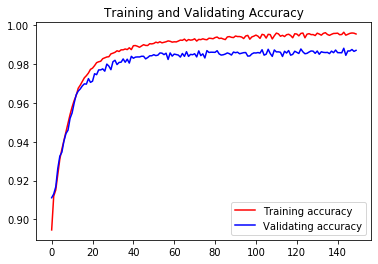

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_14_4_model.h5')